===== FIRST 5 ROWS =====
   Distance_km  Items  Traffic_Level  Processing_Time_hr  Delivery_Time_hr
0            5      2              1                 1.0               3.0
1            8      3              2                 1.5               5.0
2           12      5              3                 2.0               8.0
3            4      1              1                 0.5               2.5
4           15      6              3                 2.5              10.0

===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance_km         12 non-null     int64  
 1   Items               12 non-null     int64  
 2   Traffic_Level       12 non-null     int64  
 3   Processing_Time_hr  12 non-null     float64
 4   Delivery_Time_hr    12 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 612.0 bytes

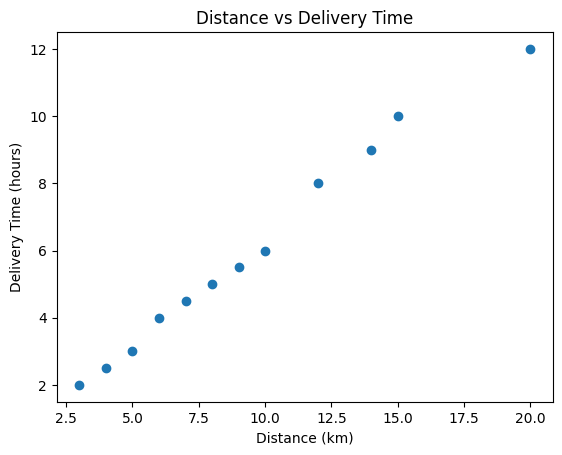

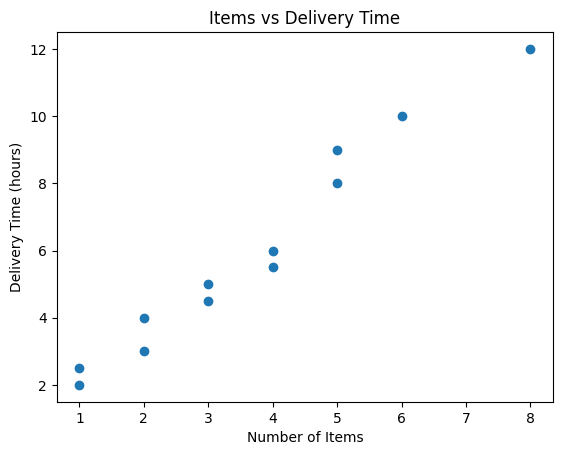

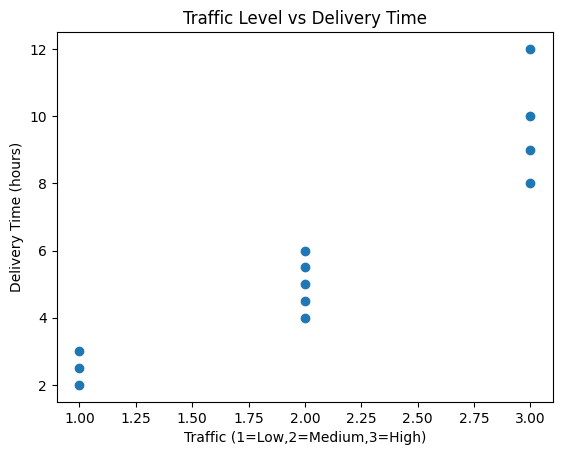

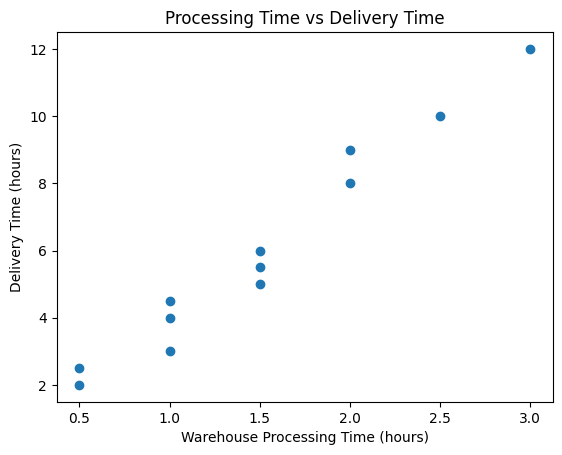


Model Coefficients:
Intercept (b0): -0.5138888888888902
b1, b2, b3, b4: [ 0.53055556 -0.23611111  0.74444444  0.54444444]

Model Performance:
Mean Absolute Error: 0.13240740740740783
R2 Score: 0.9778728070175439

Predicted Delivery Time (hours): 6.977777777777775


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# DELIVERY TIME PREDICTION PROJECT
# Multiple Linear Regression


# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load Dataset
df = pd.read_csv("/content/delievery_data.csv")

print("===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== DATASET INFO =====")
print(df.info())

print("\n===== MISSING VALUES =====")
print(df.isnull().sum())


# Step 3: Visualization


# Distance vs Delivery Time
plt.figure()
plt.scatter(df["Distance_km"], df["Delivery_Time_hr"])
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.show()

# Items vs Delivery Time
plt.figure()
plt.scatter(df["Items"], df["Delivery_Time_hr"])
plt.title("Items vs Delivery Time")
plt.xlabel("Number of Items")
plt.ylabel("Delivery Time (hours)")
plt.show()

# Traffic vs Delivery Time
plt.figure()
plt.scatter(df["Traffic_Level"], df["Delivery_Time_hr"])
plt.title("Traffic Level vs Delivery Time")
plt.xlabel("Traffic (1=Low,2=Medium,3=High)")
plt.ylabel("Delivery Time (hours)")
plt.show()

# Processing Time vs Delivery Time
plt.figure()
plt.scatter(df["Processing_Time_hr"], df["Delivery_Time_hr"])
plt.title("Processing Time vs Delivery Time")
plt.xlabel("Warehouse Processing Time (hours)")
plt.ylabel("Delivery Time (hours)")
plt.show()


# Step 4: Prepare Data

X = df[["Distance_km", "Items", "Traffic_Level", "Processing_Time_hr"]]
y = df["Delivery_Time_hr"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Step 5: Train Model


model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Coefficients:")
print("Intercept (b0):", model.intercept_)
print("b1, b2, b3, b4:", model.coef_)


# Step 6: Model Evaluation


y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


# Step 7: Predict New Delivery Time


# Example:
# Distance = 12 km
# Items = 5
# Traffic = 2 (Medium)
# ProcessingTime = 1.5 hours

new_order = [[12, 5, 2, 1.5]]
new_order_df = pd.DataFrame(new_order, columns=X.columns)
predicted_time = model.predict(new_order_df)

print("\nPredicted Delivery Time (hours):", predicted_time[0])